In [34]:
#!pip install nltk
#!pip install pipelines==0.0.12
#!pip install pipreqs
#!pip install spacy
#!pip install wordcloud
#!pip install sklearn
#!pip install svm
#!pip install wordcloud
#!pip install scikit-learn
#! pip install xgboost
#!pip install contractions
!pip install textblob
import nltk.corpus
import numpy as np
import pandas as pd
import pipreqs as pipreqs
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import re
from spacy.lang.en.tokenizer_exceptions import word
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore') 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
!pip install pipelines==0.0.12

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached pipelines-0.0.12.tar.gz (161 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached futures-3.0.5.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Jinja2-2.8-py2.py3-none-any.whl (263 kB)
  Using cached PyYAML-3.11.zip (371 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.9.1-py2.py3-none-any.whl (501 kB)
  Using cached sh-1.11.tar.gz (36 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 36, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\RAVIKU~1\AppData\Local\Temp\pip-install-fbkvufc3\sh_5160509cfa764d438a41240b4cac937e\setup.py", line 4, in <module>
      import sh
    File "C:\Users\RAVIKU~1\AppData\Local\Temp\pip-install-fbkvufc3\sh_5160509cfa764d438a41240b4cac937e\sh.py", line 37, in <module>
      support." % __version__)
  ImportError: sh 1.11 is currently only supported on linux and osx. please install pbs 0.110 (http://pypi.python.org/pypi/pbs) for windows support.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentio

In [86]:
!pip install rake-nltk
from rake_nltk import Rake

In [12]:
df=pd.read_csv("Downloads/Product_details.csv",error_bad_lines=False)

In [13]:
df

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2
...,...,...,...,...
6359,2945,Thanks @mention for hosting this event #sxsw #...,9,2
6360,4528,"SXSW iPhone app is awesome, but iPad app crash...",7,1
6361,6526,RT @mention RT @mention Download 20+ free trac...,9,2
6362,2110,OH at Texas Social Media Awards: 'You don't ne...,9,2


In [14]:
df.shape

(6364, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


In [16]:
df.describe()

,Text_ID,Product_Type,Sentiment
count,6364.000000,6364.000000,6364.000000
mean,4568.862822,7.462445,2.230673
std,2621.198346,2.440492,0.638413
min,1.000000,0.000000,0.000000
25%,2297.750000,6.000000,2.000000
50%,4587.500000,9.000000,2.000000
75%,6827.500000,9.000000,3.000000
max,9092.000000,9.000000,3.000000


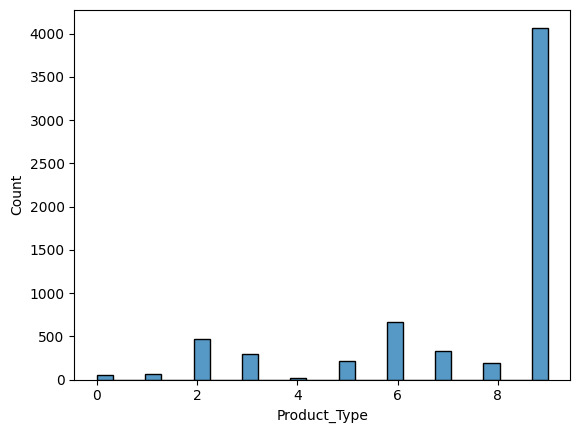

In [17]:
# Visualization some insights from Raw Data
df['Product_Type'].value_counts()
sns.histplot(df['Product_Type'])
plt.show()

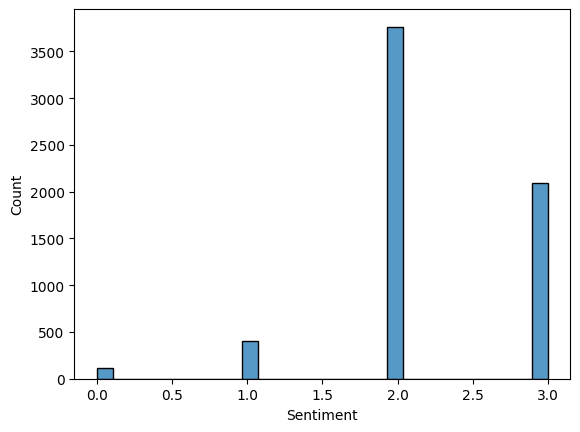

In [18]:
df['Sentiment'].value_counts()
sns.histplot(df['Sentiment'])
plt.show()

In [19]:
# Plotting Pie Chart
values = df['Product_Type'].value_counts()     # Counting the unique values frequency
labels = df['Product_Type'].unique().tolist()  # Creating the unique value labels
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)     # Exploding the first slice

([<matplotlib.patches.Wedge at 0x1bf0fe2f4c8>,
 [Text(-0.5093480623088893, 1.0865378739014024, '9'),
  Text(-0.3934610751717169, -1.0272236281962739, '6'),
  Text(0.20993732222908174, -1.07978068177537, '7'),
  Text(0.6055852680850862, -0.9182954225511061, '2'),
  Text(0.8565212032839985, -0.6901966591667419, '8'),
  Text(1.0021275639908547, -0.45358609490344337, '3'),
  Text(1.0724897166982796, -0.2444704636074552, '0'),
  Text(1.0945894982598083, -0.10896710650164619, '5'),
  Text(1.0989145371679427, -0.04885529654977469, '1'),
  Text(1.0999516158821747, -0.010317108034384714, '4')])

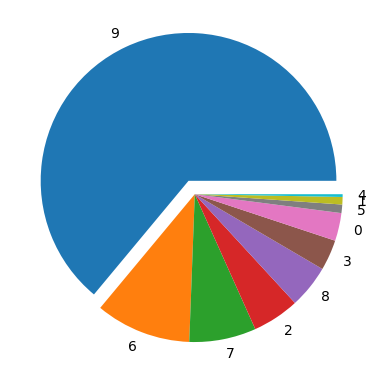

In [20]:
# Creating the Pie Chart with included exploding slice
plt.pie(values, labels = labels, explode = explode, radius = 1)

In [21]:
counter = []
for string in df.Product_Description:
    counter.append(string.count(' ') + 1)  # Num of spaces + 1

df['num_words'] = counter  # add the column
df.head(5)

,Text_ID,Product_Description,Product_Type,Sentiment,num_words
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,15
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,24
2,8212,Crazy that Apple is opening a temporary store ...,9,2,20
3,4422,The lesson from Google One Pass: In this digit...,9,2,22
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,14


In [87]:
pd.crosstab(df.Sentiment, df.Product_Type)

Product_Type,0,1,2,3,4,5,6,7,8,9
Sentiment,,,,,,,,,,
0,0,0,2,1,0,0,2,0,1,105
1,4,5,69,49,0,36,84,43,65,44
2,1,1,15,10,0,6,16,8,6,3702
3,47,53,379,240,19,171,563,276,122,219


In [89]:
pd.crosstab(df.Sentiment, df.Product_Type).apply(lambda r:r/r.sum(),axis=1)

Product_Type,0,1,2,3,4,5,6,7,8,9
Sentiment,,,,,,,,,,
0,0.000000,0.000000,0.018018,0.009009,0.000000,0.000000,0.018018,0.000000,0.009009,0.945946
1,0.010025,0.012531,0.172932,0.122807,0.000000,0.090226,0.210526,0.107769,0.162907,0.110276
2,0.000266,0.000266,0.003984,0.002656,0.000000,0.001594,0.004250,0.002125,0.001594,0.983267
3,0.022499,0.025371,0.181427,0.114888,0.009095,0.081857,0.269507,0.132121,0.058401,0.104835


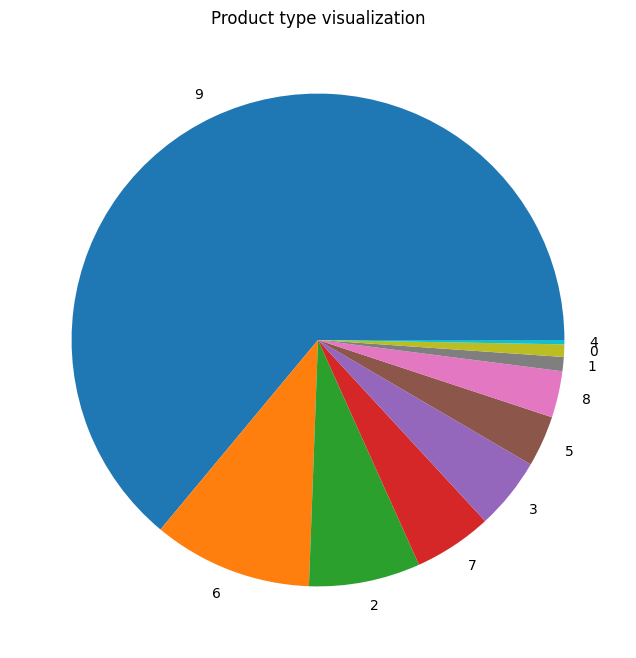

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# creating dataframe
dataFrame = pd.DataFrame({
   "Product_type": ['9', '6', '2', '7', '3', '5','8','1','0','4'],"Counts": [4070, 665, 465,327,300,213,194,59,52,18]
})

# plot a Pie Chart for Registration Price column with label Car column
plt.figure(figsize=(10,8));
plt.pie(dataFrame["Counts"], labels = dataFrame["Product_type"])
plt.title("Product type visualization")
plt.show()

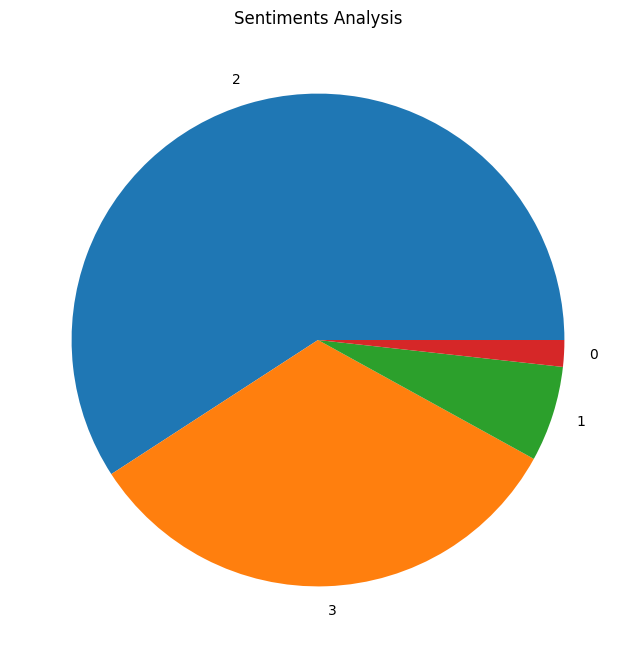

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# creating dataframe
dataFrame = pd.DataFrame({
   "Sentiments": ['2','3','1','0'],"Counts": [3765,2089,399,111]
})

# plot a Pie Chart for Registration Price column with label Car column
plt.figure(figsize=(10,8));
plt.pie(dataFrame["Counts"], labels = dataFrame["Sentiments"])
plt.title("Sentiments Analysis")
plt.show()

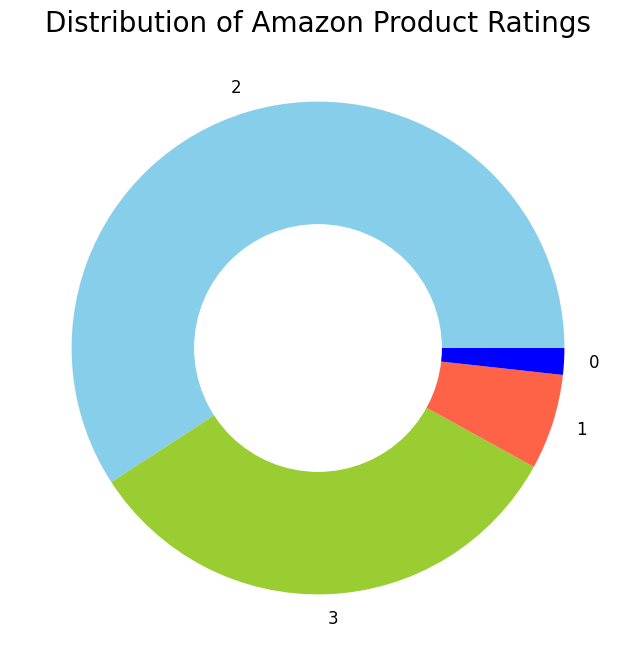

In [94]:
ratings =df["Sentiment"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [22]:
# Cleaning the Dataset
# Text Preprocessing Techniques
import re

def cleantext(text):
    text = re.sub(r"â€™", "", text)             # Remove Mentions
    text = re.sub(r"#", "", text)               # Remove Hashtags Symbol
    text = re.sub(r"\w*\d\w*", "", text)        # Remove numbers
    text = re.sub(r"https?:\/\/\S+", "", text)  # Remove The Hyper Link
    text = re.sub(r"______________", "", text)  # Remove _____
    text=re.sub(r"^a-zA-z0-9","",text)
    text=re.sub(r"[^\w\s]","",text)

    return text

In [25]:
from nltk.tokenize import word_tokenize

df['clean_text'] = df.apply(lambda x: cleantext(x['Product_Description']), axis = 1)
df['clean_text']

# Contractions
import contractions
df['no_contract'] = df['clean_text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df['no_contract']

# Tokenization
from nltk.tokenize import word_tokenize
df['tokenized']  = df['clean_text'].apply(word_tokenize)

# Lower Case Conversion
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])

# Joining df['lower']
df['lower'] = [' '.join(map(str,i)) for i in df['lower']]

df.head(5)

# Stopwords
import nltk
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

stopwords = nltk.corpus.stopwords.words('english')
newstopwords = ["SXSW", "sxsw", "link","iPhone", "upad", "Apple popup" , "RT mention", "RT", "rt", "sxsw sxsw", "Google", "DesignerÛªs" , "link sxsw", "iPad launch", "Social Network", "sxsw apple", "amp","mention google", "via mention", "called circles" , "popup store", "link via", "sxsw sxswi", "downtown austin", "ûïmention" , "sxswi", "marissa mayer", "an iPad", "Circles Possibly", "Austin for","new iPad", "iPad at", "temporary store" , "New UberSocial", "Apple i", "Apple", "popup store", "in Austin", "Called Circles", "Network Called", "Social Network", "Austin","iPad", "Apple Store", "New Social", "sxswÛ", "Facebook", "Circles Possibly", "downtown Austin", "ipad design", "designerûªs", "Marissa Mayer"] + list(stopwords)
list(newstopwords)

stops = r'\b({})\b'.format('|'.join(newstopwords))

In [26]:
df['nostop'] = df['lower'].str.replace(stops, '').str.replace('\s+', ' ')
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,num_words,clean_text,no_contract,tokenized,lower,nostop
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,15,The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...","[The, Web, DesignerÛªs, Guide, to, iOS, and, A...",the web designerûªs guide to ios and android a...,web guide ios android apps today mention
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,24,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod...","[RT, mention, Line, for, iPad, is, longer, tod...",rt mention line for ipad is longer today than ...,mention line ipad longer today yesterday gett...
2,8212,Crazy that Apple is opening a temporary store ...,9,2,20,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...","[Crazy, that, Apple, is, opening, a, temporary...",crazy that apple is opening a temporary store ...,crazy apple opening austin tomorrow handle rab...
3,4422,The lesson from Google One Pass: In this digit...,9,2,22,The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...","[The, lesson, from, Google, One, Pass, In, thi...",the lesson from google one pass in this digita...,lesson google one pass digital environment us...
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,14,RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...","[RT, mention, At, the, panel, quotYour, mom, h...",rt mention at the panel quotyour mom has an ip...,mention panel quotyour mom ipad designing boo...


In [29]:
# Now Generating Wordcloud using df['nostop']

#wordc = ' '.join(df['nostop'])
#wordcloud = WordCloud(width = 3000, height = 1500, background_color = 'black', stopwords = newstopwords, max_words = 400, colormap='Set2').generate(wordc)
#plot_cloud(wordcloud)

NameError: name 'plot_cloud' is not defined

In [30]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [31]:
# stemming ever word
df['stemmed'] = df['nostop'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [32]:
df['stemmed']

0                   web guid io android app today mention
1       mention line ipad longer today yesterday get l...
2       crazi appl open austin tomorrow handl rabid ey...
3       lesson googl one pass digit environ user want ...
4       mention panel quotyour mom ipad design boomers...
                              ...                        
6359                             thank mention host event
6360           iphon app awesom ipad app crash everi time
6361    mention mention download free track mention mu...
6362    oh texa social media award dont need ask mothe...
6363    googl launch quotmajorquot new social network ...
Name: stemmed, Length: 6364, dtype: object

In [35]:
# Lemmatization
from textblob import Word
df['lemma'] = df['stemmed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [36]:
stops = r'\b({})\b'.format('|'.join(newstopwords))
df['lemma'] = df['lemma'].str.replace(stops, '').str.replace('\s+', ' ')
df['lemma'].head(5)

0                web guid io android app today mention
1    mention line ipad longer today yesterday get l...
2    crazi appl open austin tomorrow handl rabid ey...
3    lesson googl one pas digit environ user want p...
4               mention panel quotyour mom boomersquot
Name: lemma, dtype: object

In [37]:
# Polarity and Subjectivity
from textblob import TextBlob
df['Polarity'] = df['Product_Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Product_Description'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [38]:
# Function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [39]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [40]:
# plotting graph for Polarity (Negative, Neutral, Positive)
Negative_senti = df[df['Polarity']>0]
Neutral_senti = df[df['Polarity']==0]
Positive_senti = df[df['Polarity']<0]

In [41]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

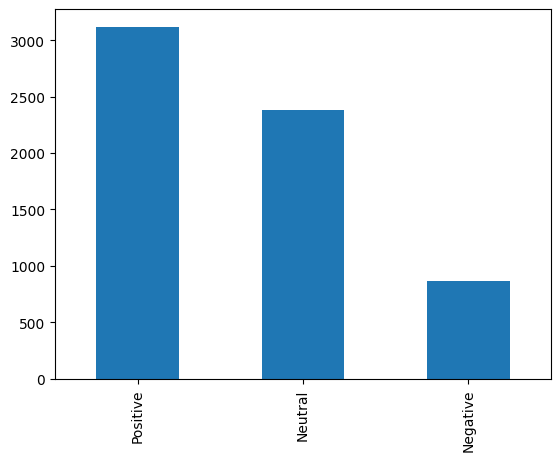

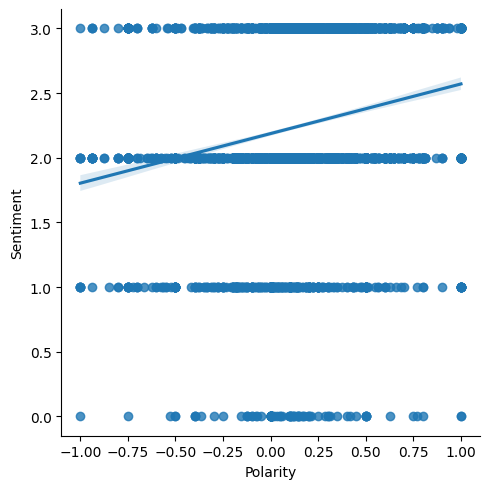

In [42]:
df['Analysis'].value_counts().plot(kind='bar')   # Bar Plot
sns.lmplot (x='Polarity', y='Sentiment', data=df, fit_reg=True)   # Scatter Plot

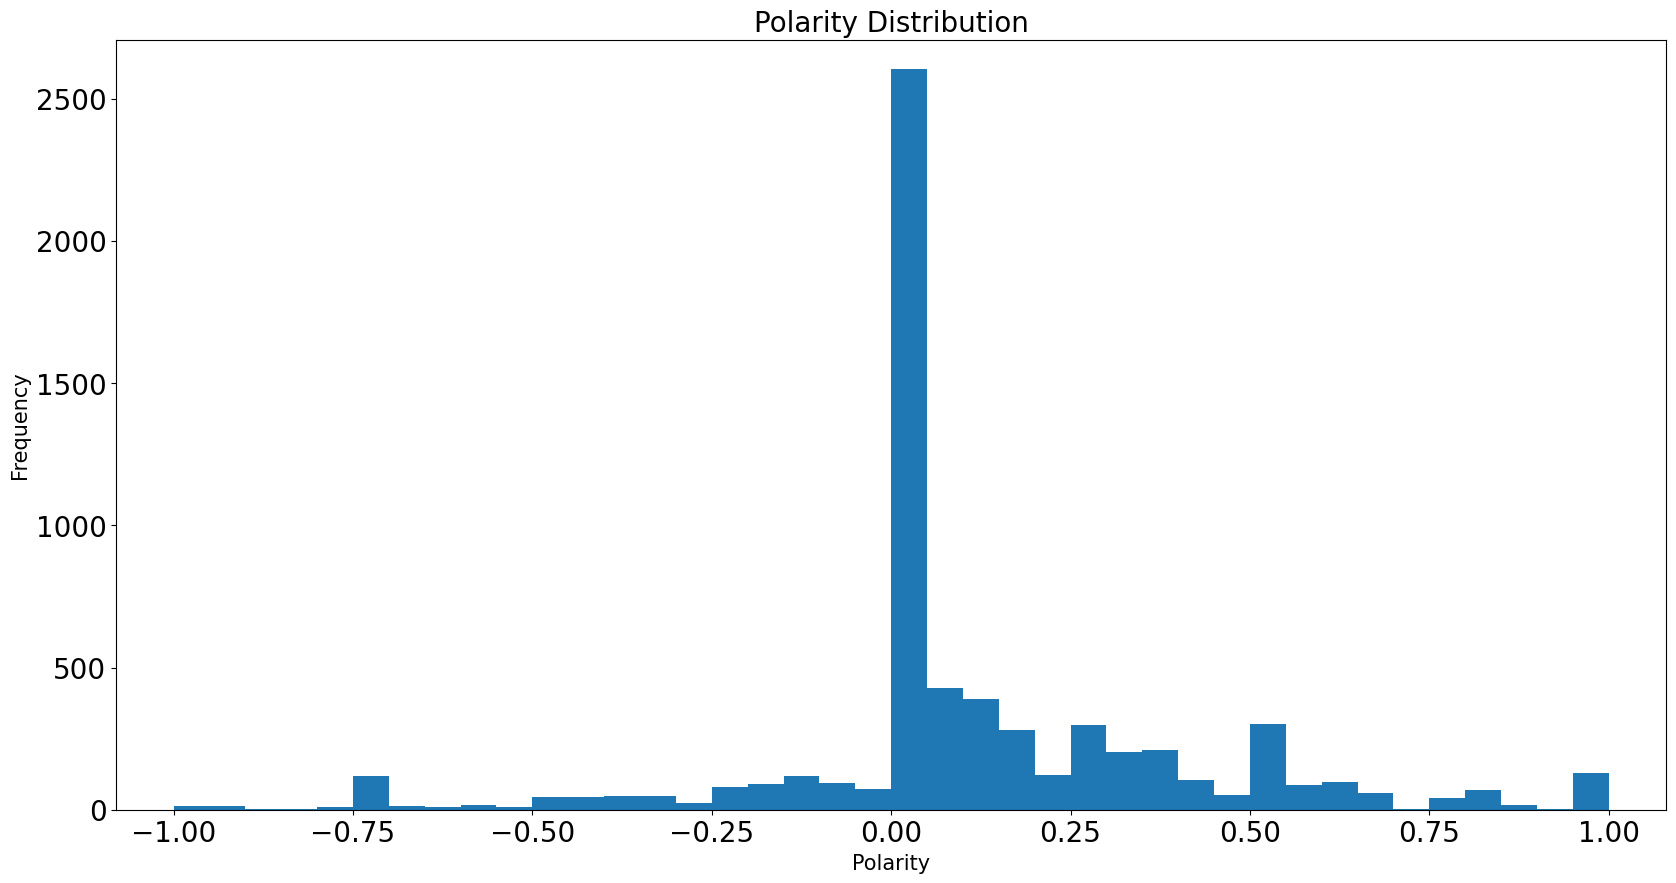

In [43]:
# Polarity Distribution
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Polarity', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(df['Polarity'], bins=40)
plt.title('Polarity Distribution', fontsize=20)
plt.show()

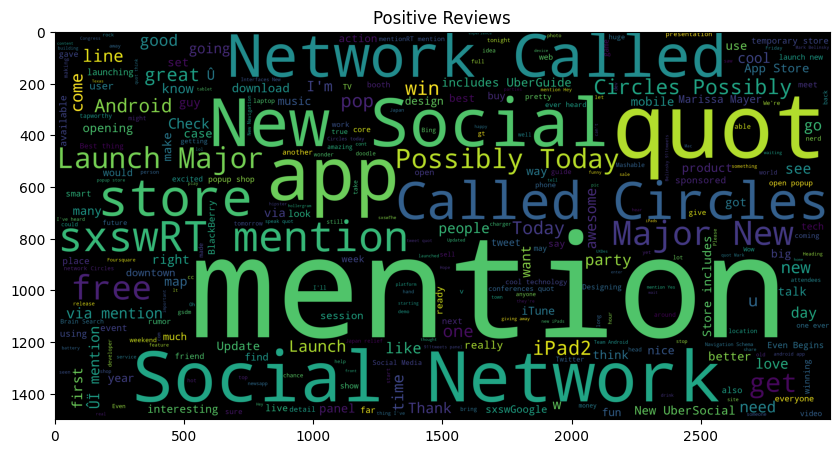

In [44]:
# Positive reviews Wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=3000, height=1500, min_font_size=10, max_words=300, stopwords=newstopwords, background_color='black')
Positive = wc.generate(df[df['Polarity']>0]['Product_Description'].str.cat(sep=""))

plt.figure(figsize=(10,10))
plt.imshow(Positive)
plt.title('Positive Reviews')
plt.show()

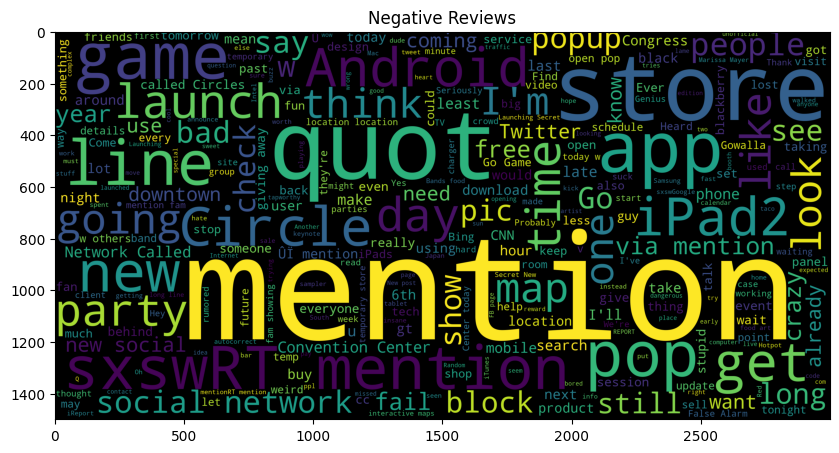

In [45]:
# Negative Reviews Wordcloud
Negative=wc.generate(df[df['Polarity']<0]['Product_Description'].str.cat(sep=""))

plt.figure(figsize=(10,10))
plt.imshow(Negative)
plt.title('Negative Reviews')
plt.show()

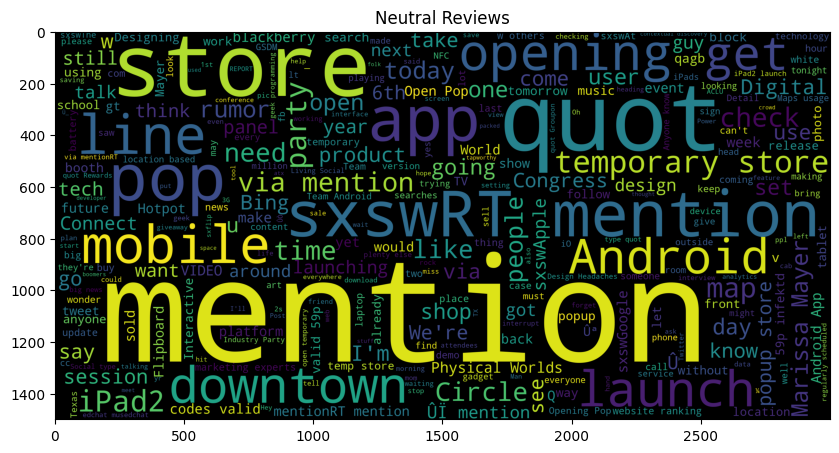

In [46]:
# Neutral Reviews Wordcloud
Neutral = wc.generate(df[df['Polarity']==0]['Product_Description'].str.cat(sep=""))

plt.figure(figsize=(10,10))
plt.imshow(Neutral)
plt.title('Neutral Reviews')
plt.show()

In [47]:

# Pivot Table
df.pivot_table(columns=['Product_Type'], values=['Polarity','Subjectivity'])

df.pivot_table(columns=['Sentiment'], values=['Polarity','Subjectivity'])

temp = df[['num_words','Product_Type','Sentiment','Polarity','Subjectivity']]
temp

,num_words,Product_Type,Sentiment,Polarity,Subjectivity
0,15,9,2,0.000000,0.000000
1,24,9,2,0.300000,0.200000
2,20,9,2,-0.600000,0.900000
3,22,9,2,0.000000,0.000000
4,14,9,2,0.000000,0.000000
...,...,...,...,...,...
6359,10,9,2,0.200000,0.200000
6360,12,7,1,1.000000,1.000000
6361,17,9,2,0.500000,0.800000
6362,19,9,2,0.033333,0.066667


In [48]:
# feature Extraction
Negative_senti.head(5)
Neutral_senti.head(5)
Positive_senti.head(5)

,Text_ID,Product_Description,Product_Type,Sentiment,num_words,clean_text,no_contract,tokenized,lower,nostop,stemmed,lemma,Polarity,Subjectivity,Analysis
2,8212,Crazy that Apple is opening a temporary store ...,9,2,20,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...","[Crazy, that, Apple, is, opening, a, temporary...",crazy that apple is opening a temporary store ...,crazy apple opening austin tomorrow handle rab...,crazi appl open austin tomorrow handl rabid ey...,crazi appl open austin tomorrow handl rabid ey...,-0.600,0.90,Negative
5,6064,RT @mention I think my effing hubby is in line...,6,1,27,RT mention I think my effing hubby is in line ...,"[RT, mention, I, think, my, effing, hubby, is,...","[RT, mention, I, think, my, effing, hubby, is,...",rt mention i think my effing hubby is in line ...,mention think effing hubby line ipad someone ...,mention think ef hubbi line ipad someon point ...,mention think ef hubbi line ipad someon point ...,-0.500,0.70,Negative
15,7667,Horrible repressed memories of the Apple spinn...,2,1,16,Horrible repressed memories of the Apple spinn...,"[Horrible, repressed, memories, of, the, Apple...","[Horrible, repressed, memories, of, the, Apple...",horrible repressed memories of the apple spinn...,horrible repressed memories apple spinning bea...,horribl repress memori appl spin beach ball co...,horribl repress memori appl spin beach ball co...,-0.500,0.50,Negative
18,6409,"RT @mention On its second day in business, the...",2,3,24,RT mention On its second day in business the A...,"[RT, mention, On, its, second, day, in, busine...","[RT, mention, On, its, second, day, in, busine...",rt mention on its second day in business the a...,mention second day business apple appears tre...,mention second day busi appl appear trend vb m...,mention second day busi appl appear trend vb m...,-0.375,0.50,Negative
24,7675,adaptive retail -- apple to open pop-up shop a...,2,3,14,adaptive retail apple to open popup shop at s...,"[adaptive, retail, apple, to, open, popup, sho...","[adaptive, retail, apple, to, open, popup, sho...",adaptive retail apple to open popup shop at sx...,adaptive retail apple open popup shop skillful...,adapt retail appl open popup shop skill done c...,adapt retail appl open popup shop skill done c...,-0.375,0.75,Negative


In [49]:
# PCA Principal Component Analysis
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(temp)
#tranforming the values
scaled_data = scaler.transform(temp)
#implementing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(scaled_data)

PCA(n_components=5)

In [50]:
x_pca = pca.transform(scaled_data)
#identifying the number of columns
print("The shape of original dataset:",scaled_data.shape)
print("The shape of dataset after implementing PCA:",x_pca.shape)
x_pca

The shape of original dataset: (6364, 5)
The shape of dataset after implementing PCA: (6364, 5)


array([[-1.25025943, -0.6239225 ,  0.10913862, -0.52549131, -0.1045484 ],
       [-0.21421744,  1.04003688, -0.51832845, -1.12062992, -0.08897738],
       [-0.88701541,  0.70981927, -1.02405754,  2.42846425, -0.72896643],
       ...,
       [ 0.42896954,  1.33643295,  1.36587696,  0.16694227, -0.05203868],
       [-0.95589441, -0.02073523, -0.37129126, -0.64079637, -0.14804614],
       [-0.84191525, -0.1416276 ,  0.47185482, -0.11258712, -0.12389918]])

In [51]:
# words into vector -BOW,Tf-idf,Wordevec
# BOW/Count Vectorization on positive sentiments/reviews

Positive_senti = [lemma.strip() for lemma in Positive_senti.lemma] # remove both the leading and the trailing characters
Positive_senti = [lemma for lemma in Positive_senti if lemma] # removes empty strings, because they are considered in Python as False
Positive_senti[0:10]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Positive_senti)

word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df.sort_values('occurrences',ascending=False)


,term,occurrences
1156,mention,538
95,appl,224
977,ipad,204
790,googl,199
982,iphon,152
...,...,...
943,indysaha,1
941,indic,1
936,inc,1
935,inbox,1


In [52]:
# BOW on Negative words
Negative_senti=Negative_senti['lemma']
Negative_senti=pd.DataFrame(data=Negative_senti)

Negative_senti = [lemma.strip() for lemma in Negative_senti.lemma] # remove both the leading and the trailing characters
Negative_senti = [lemma for lemma in Negative_senti if lemma] # removes empty strings, because they are considered in Python as False
Negative_senti[0:10]

['mention line ipad longer today yesterday get line today fun',
 'wow rtmention interrupt regularli schedul geek program big news googl circl',
 'googl launch new social network possibl today',
 'mention welcom enjoy ride anywher austin dwnld groundlink applink booth',
 'yeay mention new ubersoci iphon app store includ uberguid sponsor masha',
 'mention social import googl screw big launch circu',
 'brace audio onslaught enjoy free music sampler itun featuredartist',
 'thank heathcar digit mention publish news new medic app showcas sxswh',
 'ipad hand awesom dude gave cutsi hour line austin appl win',
 'realli like iphon app thank make event app appear work well']

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Negative_senti)

print(vectorizer.vocabulary_)


{'mention': 2372, 'line': 2191, 'ipad': 1960, 'longer': 2225, 'today': 3953, 'yesterday': 4401, 'get': 1532, 'fun': 1464, 'wow': 4342, 'rtmention': 3293, 'interrupt': 1942, 'regularli': 3191, 'schedul': 3338, 'geek': 1511, 'program': 2942, 'big': 392, 'news': 2542, 'googl': 1576, 'circl': 667, 'launch': 2134, 'new': 2537, 'social': 3547, 'network': 2530, 'possibl': 2878, 'welcom': 4243, 'enjoy': 1189, 'ride': 3253, 'anywher': 175, 'austin': 264, 'dwnld': 1119, 'groundlink': 1630, 'applink': 201, 'booth': 443, 'yeay': 4396, 'ubersoci': 4071, 'iphon': 1971, 'app': 183, 'store': 3667, 'includ': 1886, 'uberguid': 4068, 'sponsor': 3615, 'masha': 2329, 'import': 1876, 'screw': 3356, 'circu': 674, 'brace': 461, 'audio': 261, 'onslaught': 2643, 'free': 1436, 'music': 2487, 'sampler': 3313, 'itun': 2000, 'featuredartist': 1321, 'thank': 3882, 'heathcar': 1729, 'digit': 1015, 'publish': 2963, 'medic': 2356, 'showcas': 3452, 'sxswh': 3775, 'hand': 1682, 'awesom': 287, 'dude': 1115, 'gave': 1504, 

In [54]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df.sort_values('occurrences',ascending=False)

,term,occurrences
2372,mention,2245
1960,ipad,893
1576,googl,761
2537,new,695
189,appl,600
...,...,...
1269,explos,1
2816,plaid,1
1263,experienti,1
1261,expentagram,1


In [55]:
# TFidf Vectorizer on Positive Reviews
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(Positive_senti)

In [57]:
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['academi' 'academi bring' 'academi bring student' ... 'ûïcheckin'
 'ûïcheckin offersû' 'ûïlike']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
# TFidf Vectorizer on Negative Reviews
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(Negative_senti)

In [59]:
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

df.head()
temp.head()

['aapl' 'abil' 'abl' ... 'û_ cont' 'ûò' 'ûó']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,num_words,Product_Type,Sentiment,Polarity,Subjectivity
0,15,9,2,0.0,0.0
1,24,9,2,0.3,0.2
2,20,9,2,-0.6,0.9
3,22,9,2,0.0,0.0
4,14,9,2,0.0,0.0


In [60]:
corpus = df['lemma'].tolist()
corpus

['web guid io android app today mention',
 'mention line ipad longer today yesterday get line today fun',
 'crazi appl open austin tomorrow handl rabid eye pad seeker',
 'lesson googl one pas digit environ user want purchas across everi platform one tool elonsxsw',
 'mention panel quotyour mom boomersquot',
 'mention think ef hubbi line ipad someon point toward lineup wife number',
 'quotandroid user iphon user use option menu contextu menuquot mention',
 'wow rtmention interrupt regularli schedul geek program big news googl circl',
 'googl launch new social network possibl today',
 'mention welcom enjoy ride anywher austin dwnld groundlink applink booth',
 'mention appl plan keep austin wire open popup appl store',
 'yeay mention new ubersoci iphon app store includ uberguid sponsor masha',
 'know season app updat whenev open iphon app store',
 'mention mention arriv u look microsim data iphon recommend mention',
 'rumor appl open ipad launch',
 'horribl repress memori appl spin beach 

In [61]:
df['Analysis'] = df['Analysis'].replace({'Negative': -1})
df['Analysis'] = df['Analysis'].replace({'Positive': 1})
df['Analysis'] = df['Analysis'].replace({'Neutral': 0})

senti_into_number_form=df['Analysis']

senti_into_number_form.head(50)

0     0
1     1
2    -1
3     0
4     0
5    -1
6     0
7     1
8     1
9     1
10    0
11    1
12    0
13    0
14    0
15   -1
16    0
17    1
18   -1
19    1
20    0
21    1
22    0
23    1
24   -1
25    1
26    0
27    0
28    1
29    0
30    1
31    1
32    0
33    1
34    1
35    0
36    0
37   -1
38    0
39    0
40    1
41    1
42    0
43    0
44    0
45    1
46    0
47    1
48    0
49    1
Name: Analysis, dtype: int64

In [62]:
# Corpus converted into array using TFidf
vectorizer4 = TfidfVectorizer(max_features=8000)
idf = vectorizer4.fit_transform(corpus).toarray()
idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
import pickle
pickle_out=open('vectorizer4.pkl','wb')
pickle.dump(vectorizer4,pickle_out)
pickle_out.close()

In [64]:
xtfidf = pd.DataFrame(idf)
xtfidf

,0,1,2,3,4,5,6,7,8,9,...,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#Target var
ytfidf=df['Sentiment']
ytfidf.value_counts() # checking whether data is balanced or imbalanced

2    3765
3    2089
1     399
0     111
Name: Sentiment, dtype: int64

In [66]:
# Test and Split Training Data
from sklearn.model_selection import train_test_split

x_traintfidf, x_testtfidf,y_traintfidf,y_testtfidf = train_test_split(xtfidf,ytfidf, test_size=0.33,random_state=0)
x_traintfidf.shape,y_traintfidf.shape, x_testtfidf.shape,y_testtfidf.shape

((4263, 6911), (4263,), (2101, 6911), (2101,))

In [67]:
# Balancing the splitted (tfidf) data using SMOTE method
#from imblearn.over_sampling import SMOTE

#upsample = SMOTE()
#x_traintfidf1, y_traintfidf1 = upsample.fit_resample(x_traintfidf, y_traintfidf)

ModuleNotFoundError: No module named 'imblearn'

In [68]:
!pip install klib

     -------------------------------------- 292.8/292.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [69]:
!pip install k-fold-imblearn

  Using cached k_fold_imblearn-1.0.0-py3-none-any.whl (9.4 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [71]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_Lg=LogisticRegression()
#Support Vector Classification
from sklearn.svm import SVC
svm_model=SVC()
#NB
from sklearn.naive_bayes import MultinomialNB
NB_model=MultinomialNB()
#Random ForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
#XGBoost Classifier
from xgboost import XGBClassifier
XGBoost_model=XGBClassifier()
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
AB_model=AdaBoostClassifier()

In [72]:
lstmodel=[model_Lg,svm_model,NB_model,RF_model,XGBoost_model,AB_model,]
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
for i in lstmodel:
 print(i)
 i.fit(x_traintfidf,y_traintfidf)
 y_pred=i.predict(x_testtfidf)
 print('********************************************************************************')
 print(classification_report(y_testtfidf,y_pred))
 print('*****************************************************************************')

LogisticRegression()
********************************************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       1.00      0.01      0.03       136
           2       0.66      0.89      0.76      1234
           3       0.64      0.40      0.49       701

    accuracy                           0.66      2101
   macro avg       0.57      0.33      0.32      2101
weighted avg       0.67      0.66      0.61      2101

*****************************************************************************
SVC()
********************************************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.50      0.02      0.04       136
           2       0.65      0.91      0.76      1234
           3       0.67      0.34      0.45       701

    accuracy              

In [75]:
!pip install imbalanced-learn

In [155]:
# Balancing the splitted (tfidf) data using SMOTE method
#from imblearn.over_sampling import SMOTE
#upsample=SMOTE()
#x_traintfidf1, y_traintfidf1 = upsample.fit_resample(x_traintfidf,y_traintfidf)

AttributeError: 'NoneType' object has no attribute 'split'

In [73]:
#target y
ytfidf1=df['Sentiment']
ytfidf1.value_counts()

2    3765
3    2089
1     399
0     111
Name: Sentiment, dtype: int64

In [74]:
# Model building with balanced data using Tfidf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_traintfidf,y_traintfidf)
y_pred_test_lr=lr.predict(x_testtfidf)
y_pred_train_lr=lr.predict(x_traintfidf)

In [76]:
# accuracy score
accuracy_train_LR=accuracy_score(y_traintfidf,y_pred_train_lr)*100
accuracy_test_LR= accuracy_score(y_testtfidf, y_pred_test_lr) * 100
print('Accuracy of Training data =',accuracy_train_LR)
print("Accuracy of Test data =", accuracy_test_LR)
print(classification_report(y_testtfidf, y_pred_test_lr))

Accuracy of Training data = 79.8498709828759
Accuracy of Test data = 65.7782008567349
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       1.00      0.01      0.03       136
           2       0.66      0.89      0.76      1234
           3       0.64      0.40      0.49       701

    accuracy                           0.66      2101
   macro avg       0.57      0.33      0.32      2101
weighted avg       0.67      0.66      0.61      2101



In [77]:
#2. Random Forest
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier()
RF.fit(x_traintfidf,y_traintfidf)
y_pred_test_RF=RF.predict(x_testtfidf)
y_pred_train_RF=RF.predict(x_traintfidf)

# accuracy score
accuracy_train_RF=accuracy_score(y_traintfidf,y_pred_train_RF)*100
accuracy_test_RF= accuracy_score(y_testtfidf, y_pred_test_RF) * 100
print('Accuracy of Training data =',accuracy_train_RF)
print("Accuracy of Test data =", accuracy_test_RF)

print(classification_report(y_testtfidf, y_pred_test_RF))

Accuracy of Training data = 99.15552427867699
Accuracy of Test data = 66.06377915278439
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.64      0.10      0.18       136
           2       0.66      0.91      0.76      1234
           3       0.69      0.36      0.47       701

    accuracy                           0.66      2101
   macro avg       0.50      0.34      0.35      2101
weighted avg       0.66      0.66      0.62      2101



In [78]:
#SVM
from sklearn.svm import LinearSVC
SVM= LinearSVC()
SVM.fit(x_traintfidf,y_traintfidf)
y_pred_test_SVM=SVM.predict(x_testtfidf)
y_pred_train_SVM=SVM.predict(x_traintfidf)

print(classification_report(y_testtfidf, y_pred_test_SVM))

accuracy_train_SVM=accuracy_score(y_traintfidf,y_pred_train_SVM)*100
accuracy_test_SVM= accuracy_score(y_testtfidf, y_pred_test_SVM) * 100
print('Accuracy of Training data =',accuracy_train_SVM)
print("Accuracy of Test data =", accuracy_test_SVM)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.59      0.19      0.29       136
           2       0.70      0.82      0.76      1234
           3       0.60      0.51      0.56       701

    accuracy                           0.67      2101
   macro avg       0.47      0.38      0.40      2101
weighted avg       0.65      0.67      0.65      2101

Accuracy of Training data = 92.51700680272108
Accuracy of Test data = 66.6825321275583


In [79]:
#4.Naive Bayes classifier for multinomial models

from sklearn.naive_bayes import MultinomialNB
MULT_NB= MultinomialNB()
MULT_NB.fit(x_traintfidf,y_traintfidf)
y_pred_test_mult_nb=MULT_NB.predict(x_testtfidf)
y_pred_train_mult_nb=MULT_NB.predict(x_traintfidf)

accuracy_train_MULT_NB=accuracy_score(y_traintfidf,y_pred_train_mult_nb)*100
accuracy_test_MULT_NB= accuracy_score(y_testtfidf, y_pred_test_mult_nb) * 100
print('Accuracy of Training data =',accuracy_train_MULT_NB)
print("Accuracy of Test data =", accuracy_test_MULT_NB)
print(classification_report(y_testtfidf, y_pred_test_mult_nb))

Accuracy of Training data = 72.69528501055595
Accuracy of Test data = 63.493574488338886
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       1.00      0.01      0.01       136
           2       0.63      0.96      0.76      1234
           3       0.71      0.21      0.32       701

    accuracy                           0.63      2101
   macro avg       0.58      0.29      0.27      2101
weighted avg       0.67      0.63      0.55      2101



In [80]:
# 5AdaBoost classifier on tfidf features
from sklearn.ensemble import AdaBoostClassifier
ADA= AdaBoostClassifier()
ADA.fit(x_traintfidf,y_traintfidf)
y_pred_test_ada=ADA.predict(x_testtfidf)
y_pred_train_ada=ADA.predict(x_traintfidf)

accuracy_train_ADA=accuracy_score(y_traintfidf,y_pred_train_ada)*100
accuracy_test_ADA= accuracy_score(y_testtfidf, y_pred_test_ada) * 100
print('Accuracy of Training data =',accuracy_train_ADA)
print("Accuracy of Test data =", accuracy_test_ADA)
print(classification_report(y_testtfidf, y_pred_test_ada))

Accuracy of Training data = 60.96645554773633
Accuracy of Test data = 59.44788196097096
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.67      0.04      0.08       136
           2       0.60      0.94      0.73      1234
           3       0.52      0.12      0.19       701

    accuracy                           0.59      2101
   macro avg       0.45      0.28      0.25      2101
weighted avg       0.57      0.59      0.50      2101



In [81]:
# 6.KNN
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

KNN= AdaBoostClassifier()
KNN.fit(x_traintfidf,y_traintfidf)
y_pred_test_KNN=KNN.predict(x_testtfidf)
y_pred_train_KNN=KNN.predict(x_traintfidf)

accuracy_train_KNN=accuracy_score(y_traintfidf,y_pred_train_ada)*100
accuracy_test_KNN= accuracy_score(y_testtfidf, y_pred_test_ada) * 100
print('Accuracy of Training data =',accuracy_train_KNN)
print("Accuracy of Test data =", accuracy_test_KNN)
print(classification_report(y_testtfidf, y_pred_test_KNN))

Accuracy of Training data = 60.96645554773633
Accuracy of Test data = 59.44788196097096
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.67      0.04      0.08       136
           2       0.60      0.94      0.73      1234
           3       0.52      0.12      0.19       701

    accuracy                           0.59      2101
   macro avg       0.45      0.28      0.25      2101
weighted avg       0.57      0.59      0.50      2101



In [82]:
#7.XG-Boost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

XGB = XGBClassifier()
XGB.fit(x_traintfidf,y_traintfidf)

# make predictions for test data
y_pred_test_XGB = XGB.predict(x_testtfidf)
y_pred_train_XGB = XGB.predict(x_traintfidf)

accuracy_train_XGB=accuracy_score(y_traintfidf,y_pred_train_ada)*100
accuracy_test_XGB= accuracy_score(y_testtfidf, y_pred_test_ada) * 100
print('Accuracy of Training data =',accuracy_train_XGB)
print("Accuracy of Test data =", accuracy_test_XGB)
print(classification_report(y_testtfidf, y_pred_test_XGB))

Accuracy of Training data = 60.96645554773633
Accuracy of Test data = 59.44788196097096
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.59      0.10      0.16       136
           2       0.67      0.89      0.76      1234
           3       0.66      0.41      0.50       701

    accuracy                           0.66      2101
   macro avg       0.48      0.35      0.36      2101
weighted avg       0.65      0.66      0.63      2101



In [84]:
#Saving the Best Model
filename = 'saved_lr_model.pkl'
pickle.dump(lr,open(filename,'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_testtfidf)

array([2, 2, 3, ..., 2, 2, 2], dtype=int64)